In [1]:
import numpy as np

from Lineaire.Linear import *
from Loss.MSELoss import *
from Activation.Tanh import Tanh
from Activation.Sigmoide import Sigmoide
from Activation.ReLu import ReLU
from Encapsulation.Sequentiel import Sequentiel
from Encapsulation.Optim import SGD
from Encapsulation.fonctions import evaluate_encapsulation

from utils import tools as tl


Classification binaire de données non séparables

# Tests mélange 4 gaussiennes

In [2]:
size=1000
np.random.seed(5)

datax, datay = tl.gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=1, epsilon=0.1)
testx, testy = tl.gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=1, epsilon=0.1)


datay = np.where(datay==-1,0,1).reshape((-1,1))
testy = np.where(testy==-1,0,1).reshape((-1,1))

## Tests avec modele 2 -> 4 -> 1

In [36]:
loss_mse = MSELoss()
lineaire1 = Linear( datax.shape[1], 4, init_type=1)
lineaire2 = Linear(4, 1, init_type=1)
sig = Sigmoide()
tan = Tanh()

iter = 250

net = Sequentiel(lineaire1, tan, lineaire2, sig)

net, couts, opt = SGD(net, datax,datay,nb_batch=1, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=False)


ic| X.shape: (1000, 2), Y.shape: (1000, 1)


accuracy train:  0.997
accuracy test:  0.996


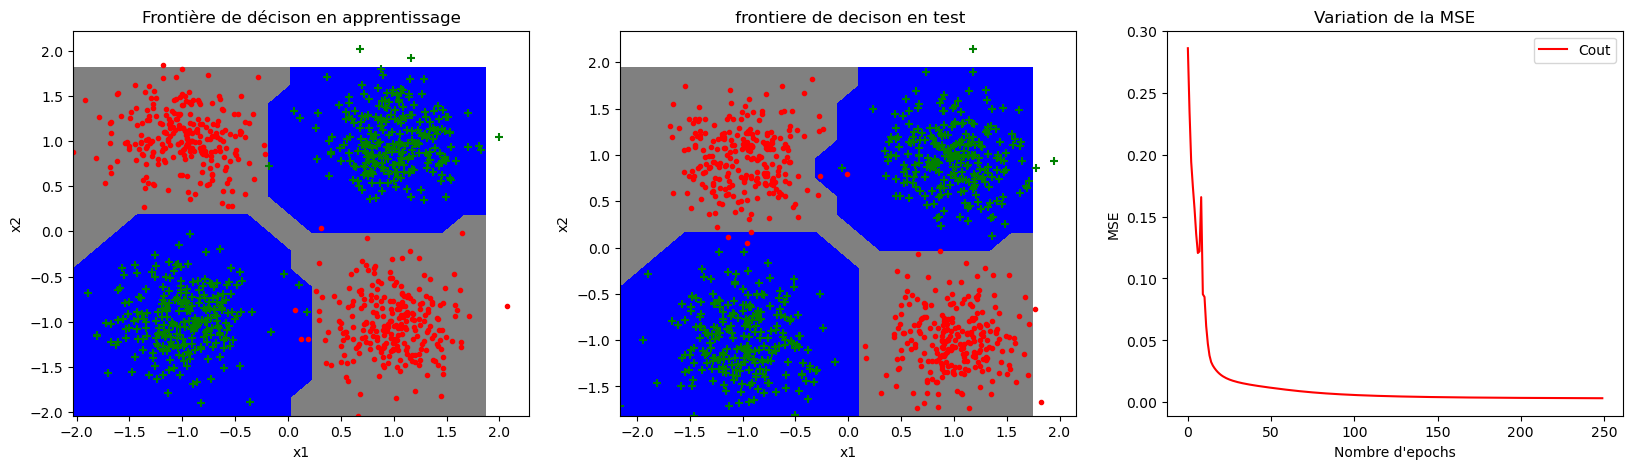

In [37]:
evaluate_encapsulation(opt, datax, datay, testx, testy)

## Tests avec modele 2 -> 1

In [38]:
loss_mse = MSELoss()
lineaire1 = Linear(datax.shape[1], 1, init_type=1)
sig = Sigmoide()

iter = 50

net = Sequentiel(lineaire1, sig)

net, couts, opt = SGD(net, datax,datay,nb_batch=1, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=False)


ic| X.shape: (1000, 2), Y.shape: (1000, 1)


accuracy train:  0.494
accuracy test:  0.511


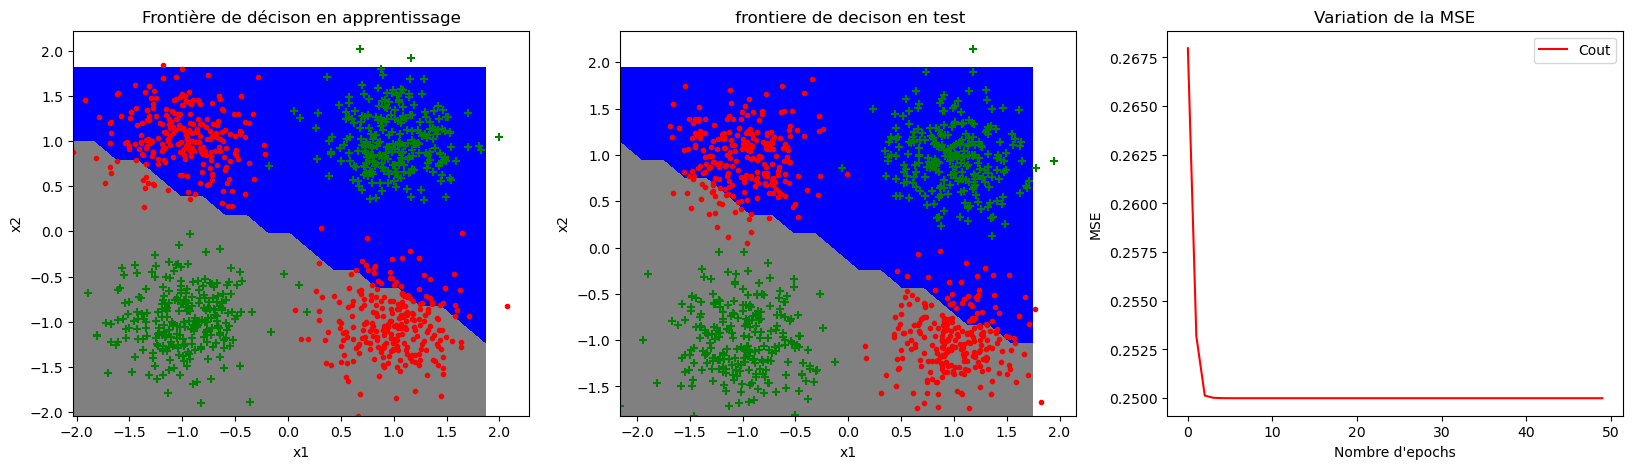

In [39]:
evaluate_encapsulation(opt, datax, datay, testx, testy)

# Tests echiquier

In [3]:
size =1000
np.random.seed(5)

datax, datay = tl.gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=2, epsilon=0.1)
testx, testy = tl.gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=2, epsilon=0.1)


datay = np.where(datay==-1,0,1).reshape((-1,1))
testy = np.where(testy==-1,0,1).reshape((-1,1))

## Shuffle False

In [17]:
loss_mse = MSELoss()
lineaire1 = Linear(datax.shape[1], 4, init_type=1)
lineaire2 = Linear(4, 1, init_type=1)
sig = Sigmoide()
tan = Tanh()

iter = 1000

net = Sequentiel(lineaire1, tan, lineaire2, sig)

net, couts, opt = SGD(net, datax,datay,nb_batch=10, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=False)

ic| X.shape: (1000, 2), Y.shape: (1000, 1)


accuracy train:  0.609
accuracy test:  0.577


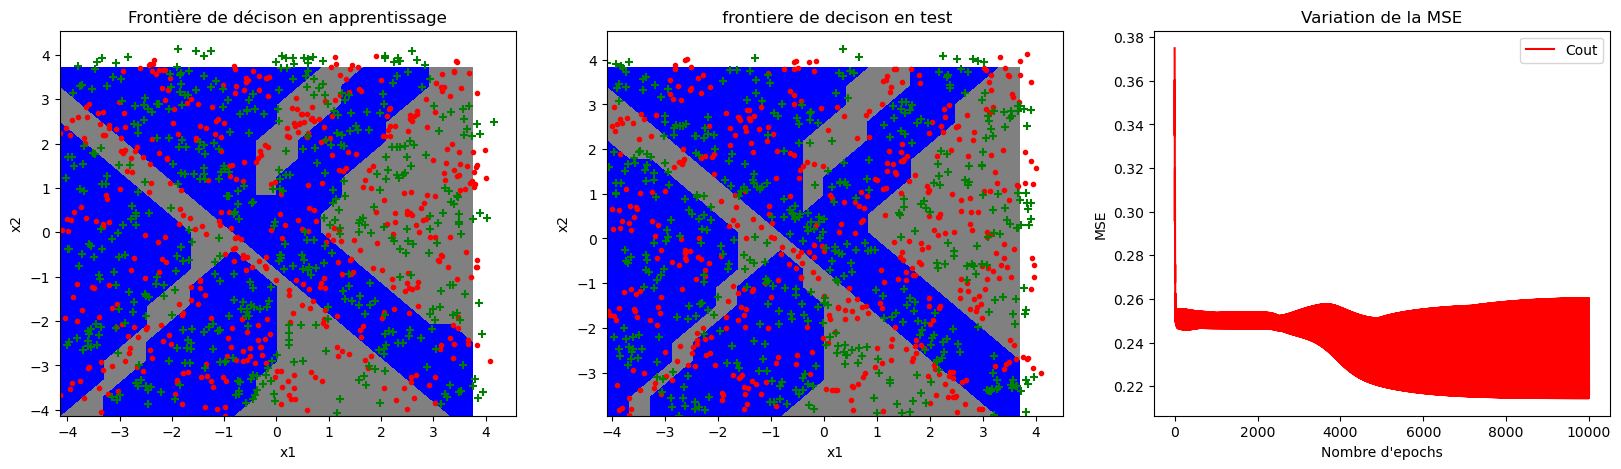

In [18]:
evaluate_encapsulation(opt, datax, datay, testx, testy)

## Shuffle True

In [19]:
loss_mse = MSELoss()
lineaire1 = Linear(datax.shape[1], 4, init_type=1)
lineaire2 = Linear(4, 1, init_type=1)
sig = Sigmoide()
tan = Tanh()

iter = 1000

net = Sequentiel(lineaire1, tan, lineaire2, sig)

net, couts, opt = SGD(net, datax,datay,nb_batch=10, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=True)


ic| X.shape: (1000, 2), Y.shape: (1000, 1)


accuracy train:  0.549
accuracy test:  0.508


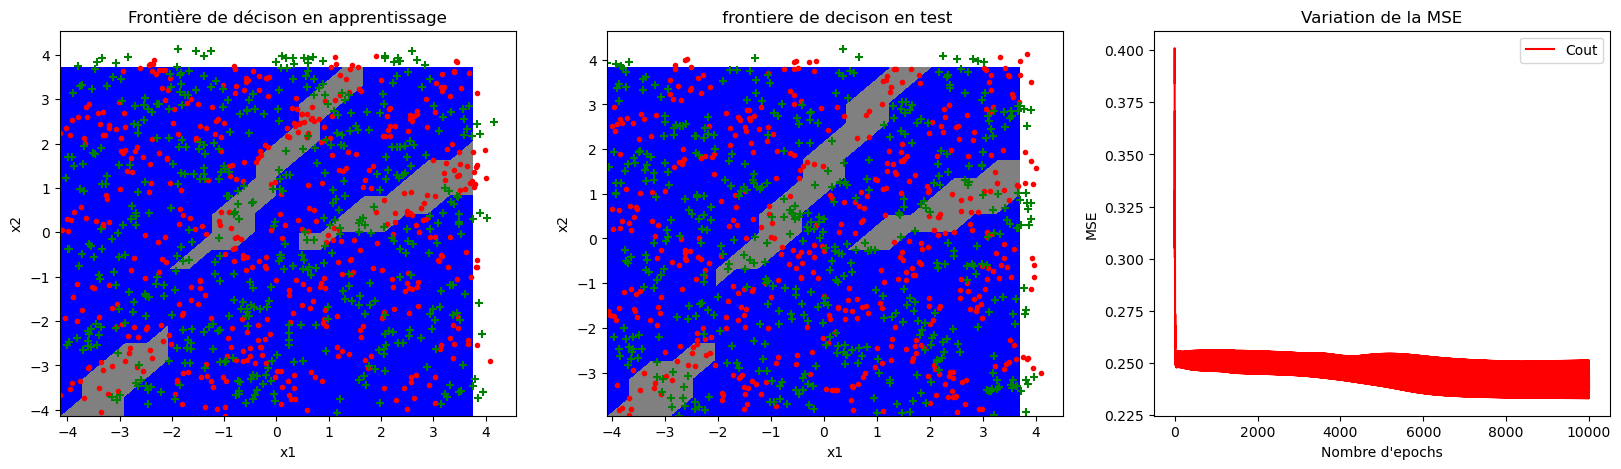

In [20]:
evaluate_encapsulation(opt, datax, datay, testx, testy)

On pourrait dire que le fait de shuffle n'a pas d'importance pour ce dataset car les données paraissent à la base indépendantes 

## Modele plus profond

In [28]:
loss_mse = MSELoss()
lineaire1 = Linear(datax.shape[1], 32, init_type=1)
lineaire2 = Linear(32, 64, init_type=1)
lineaire3 = Linear(64, 32, init_type=1)
lineaire4 = Linear(32, 1, init_type=1)

sig = Sigmoide()
tan1 = Tanh()
tan2 = Tanh()
tan3 = Tanh()

iter = 300

net = Sequentiel(lineaire1, tan2, lineaire2, tan2, lineaire3, tan3, lineaire4, sig)

net, couts, opt = SGD(net, datax, datay, nb_batch=30, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=False)

ic| X.shape: (1000, 2), Y.shape: (1000, 1)


### Evaluations

eps = 1e-2

accuracy train:  0.633
accuracy test:  0.628


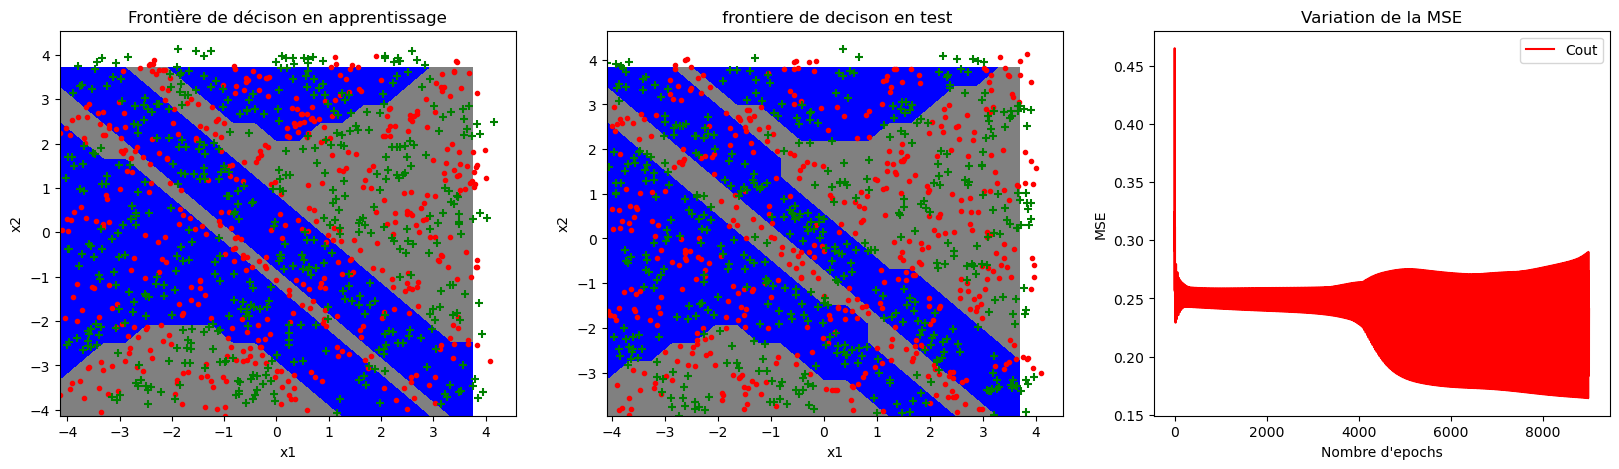

In [29]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # iter = 300 et nb batch 30

accuracy train:  0.93
accuracy test:  0.781


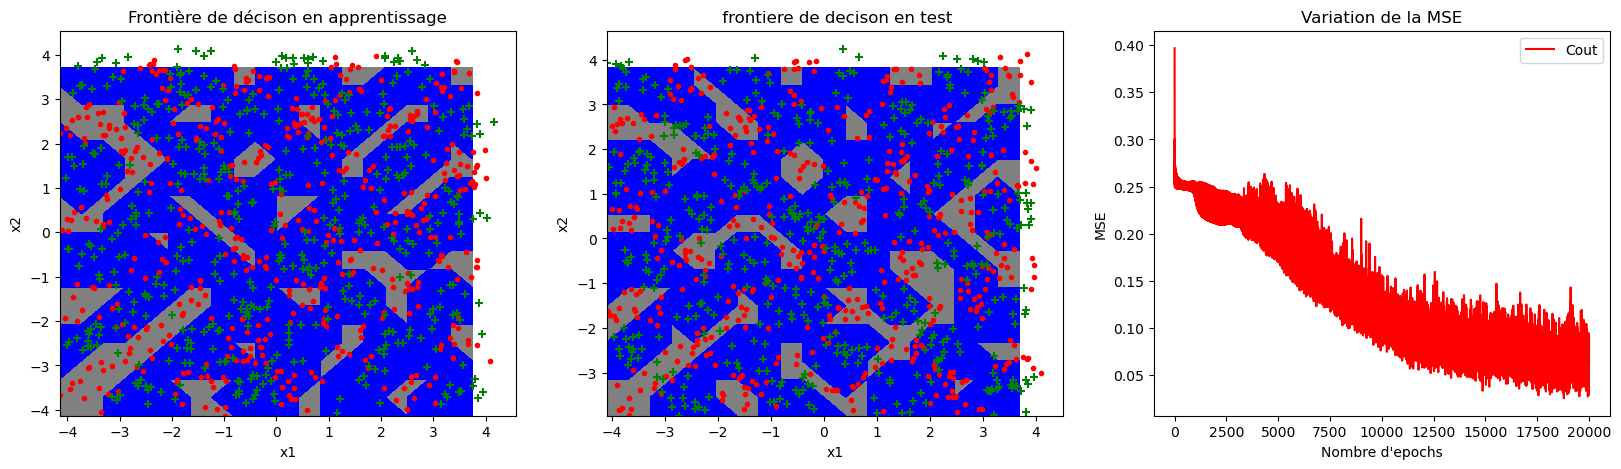

In [27]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # 2000 et 10

accuracy train:  0.906
accuracy test:  0.782


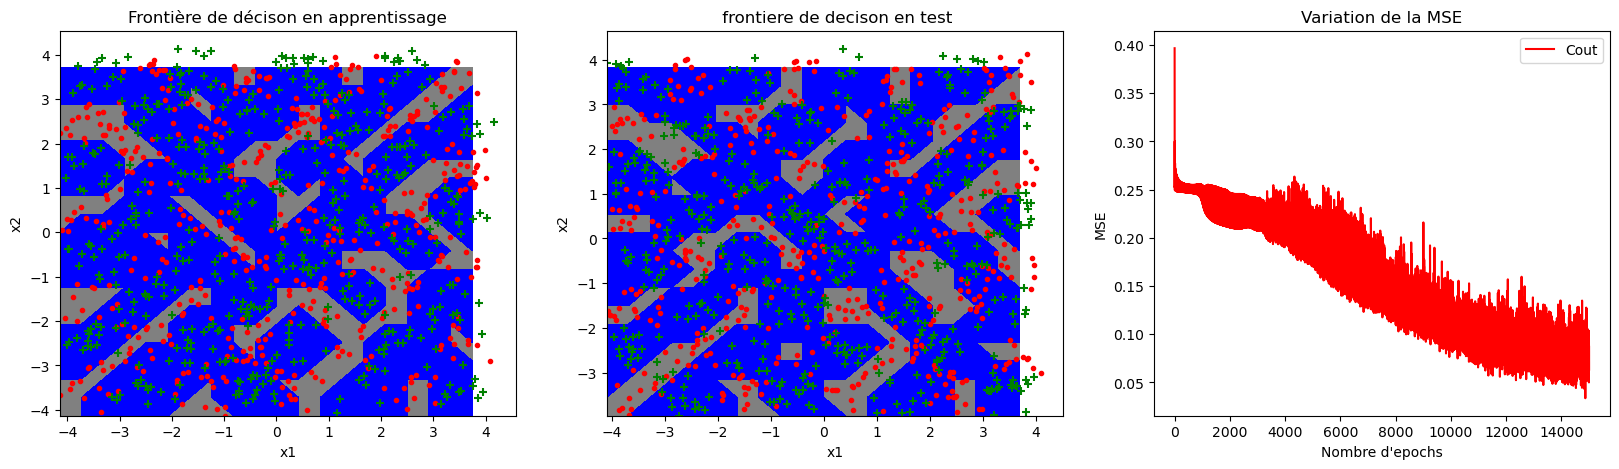

In [25]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # 1500 et 10

accuracy train:  0.842
accuracy test:  0.753


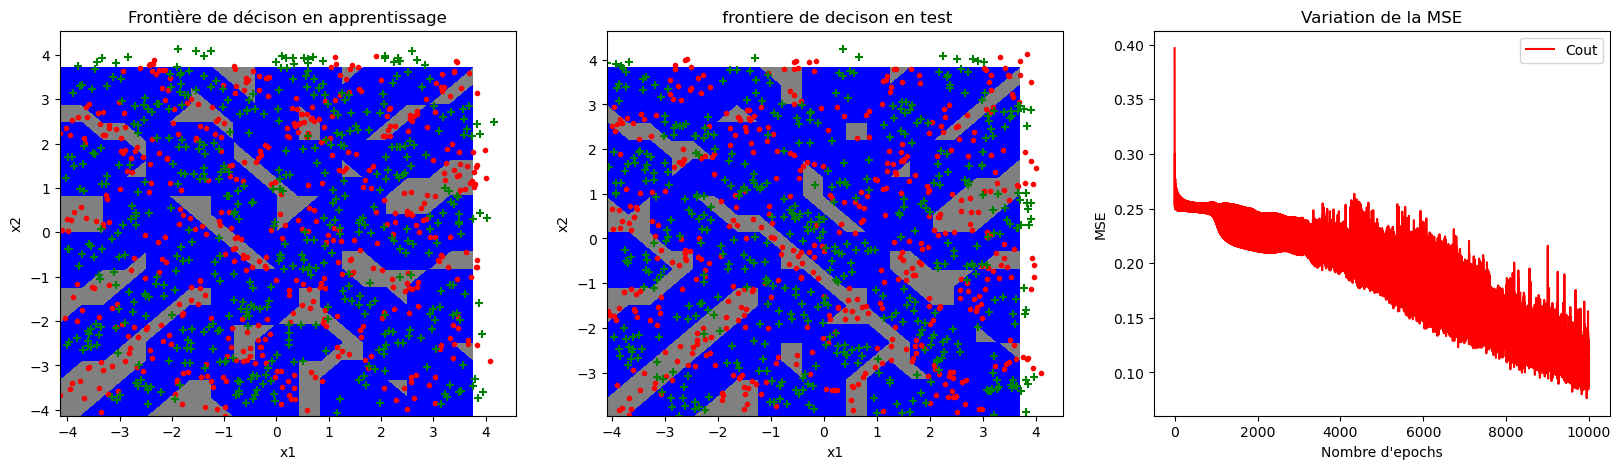

In [48]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # 1000 et 10

In [22]:
loss_mse = MSELoss()
lineaire1 = Linear(datax.shape[1], 32, init_type=1)
lineaire2 = Linear(32, 64, init_type=1)
lineaire3 = Linear(64, 32, init_type=1)
lineaire4 = Linear(32, 1, init_type=1)

sig = Sigmoide()
tan1 = Tanh()
tan2 = Tanh()
tan3 = Tanh()

iter = 600

net = Sequentiel(lineaire1, tan2, lineaire2, tan2, lineaire3, tan3, lineaire4, sig)

net, couts, opt = SGD(net, datax, datay, nb_batch=20, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=False)

ic| X.shape: (1000, 2),

 Y.shape: (1000, 1)


accuracy train:  0.735
accuracy test:  0.674


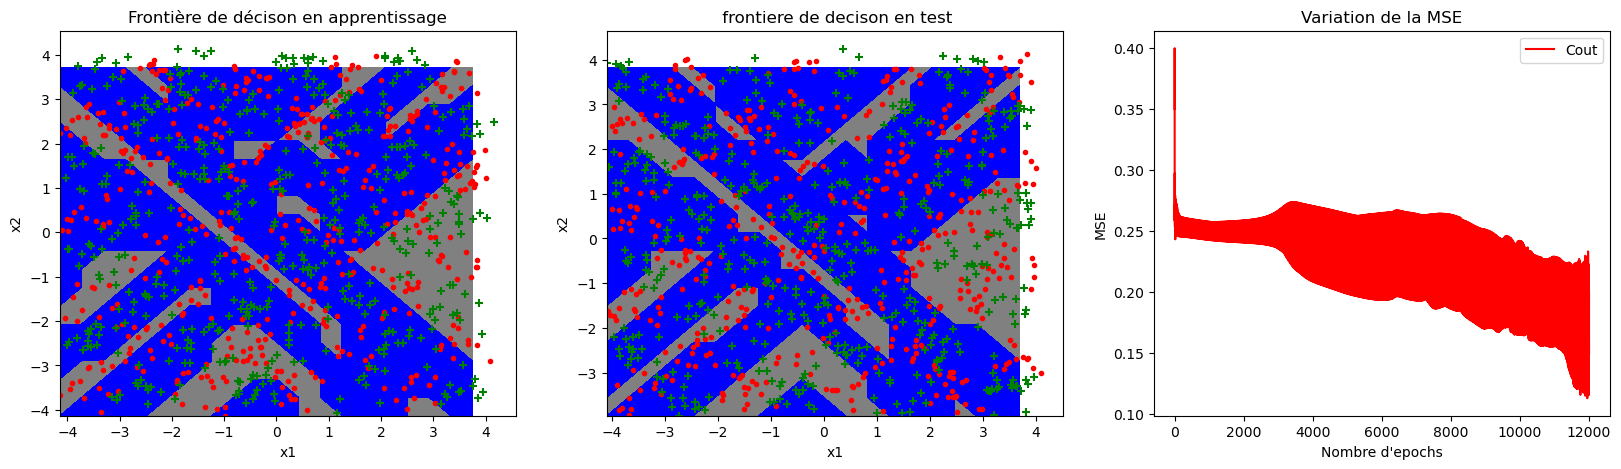

In [23]:
evaluate_encapsulation(opt, datax, datay, testx, testy) #iter == 600, nbbatch = 20

accuracy train:  0.692
accuracy test:  0.661


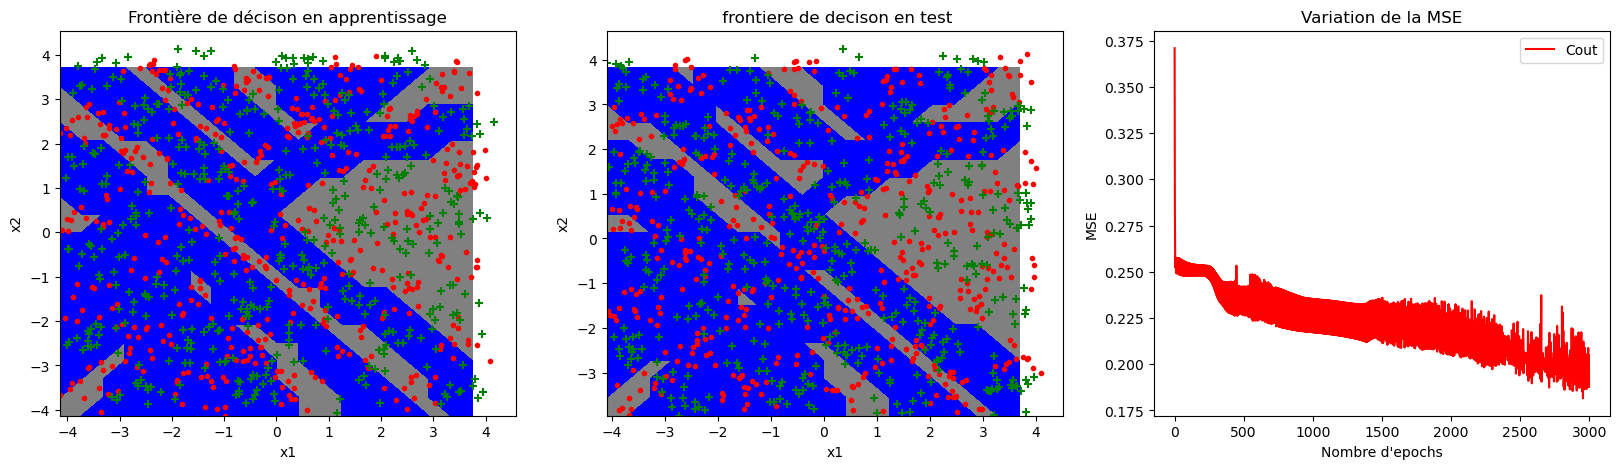

In [21]:
evaluate_encapsulation(opt, datax, datay, testx, testy) #iter == 600, nbbatch = 5

accuracy train:  0.747
accuracy test:  0.702


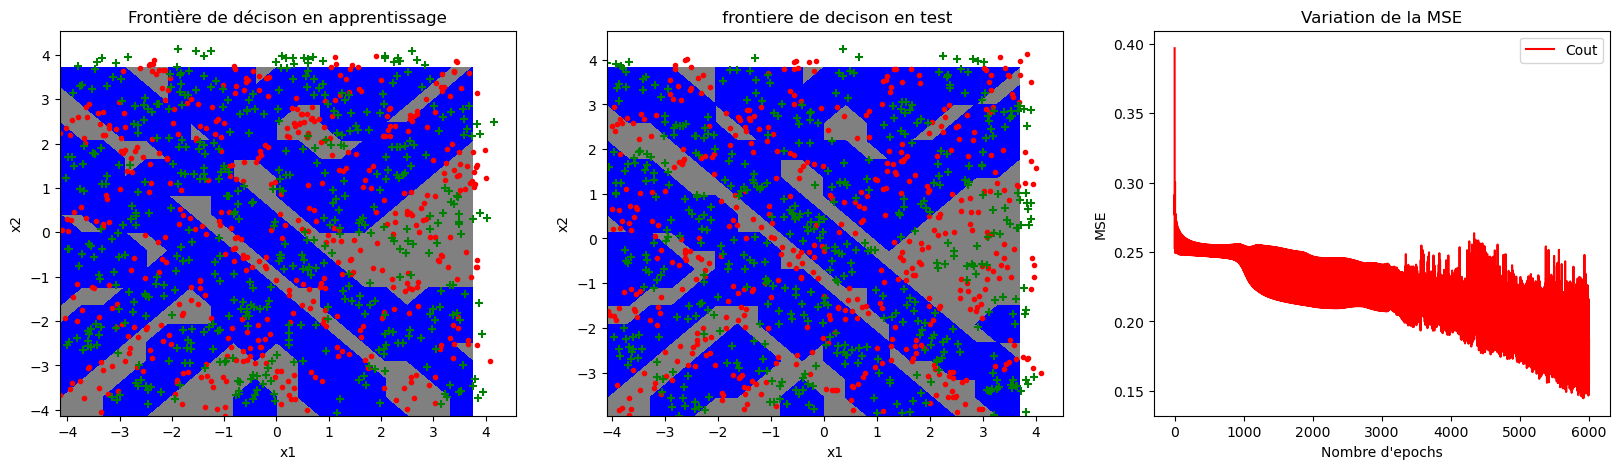

In [18]:
evaluate_encapsulation(opt, datax, datay, testx, testy) #iter == 600, nbbatch = 10

accuracy train:  0.728
accuracy test:  0.682


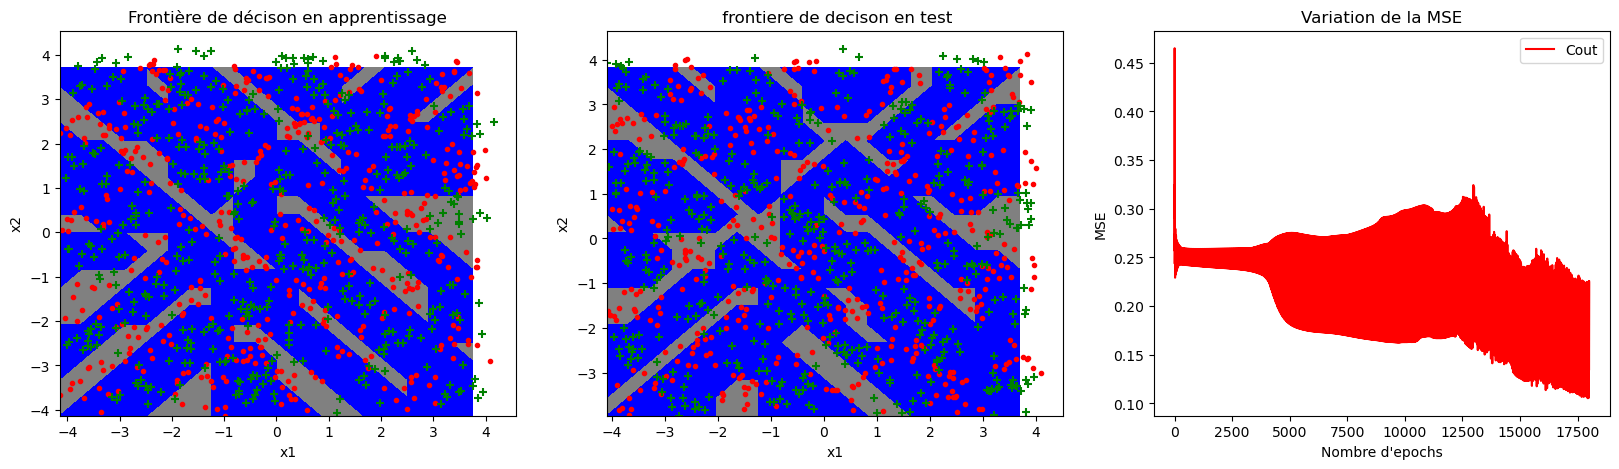

In [16]:
evaluate_encapsulation(opt, datax, datay, testx, testy) #iter == 600, nbbatch = 30

accuracy train:  0.71
accuracy test:  0.659


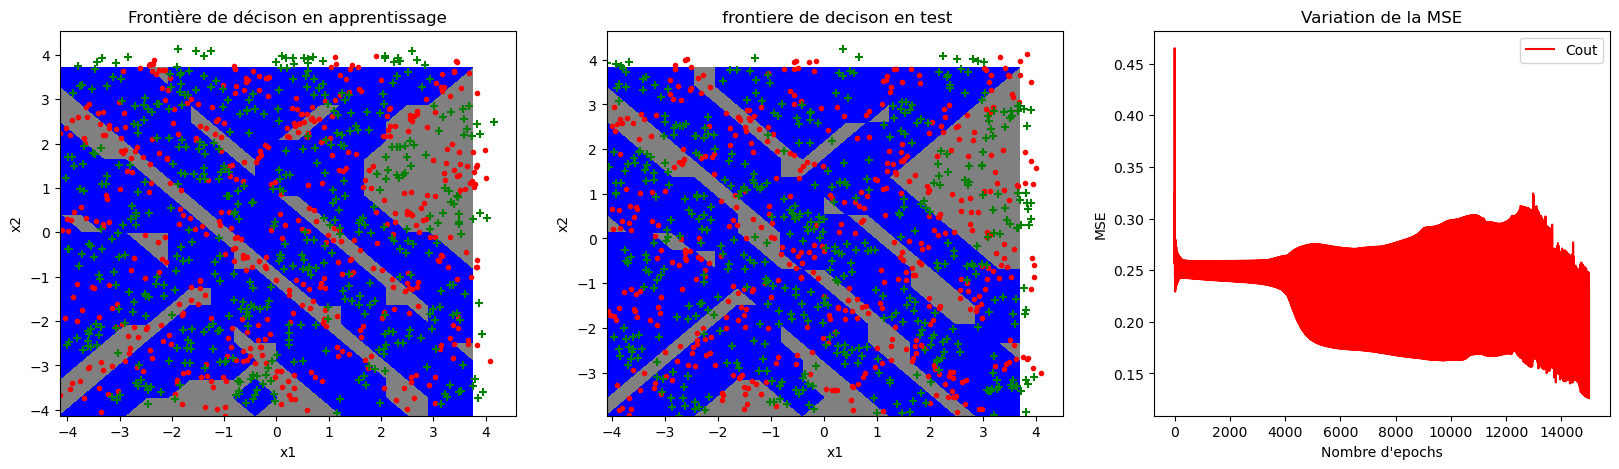

In [14]:
evaluate_encapsulation(opt, datax, datay, testx, testy) #iter == 500, nbbatch = 30

accuracy train:  0.628
accuracy test:  0.626


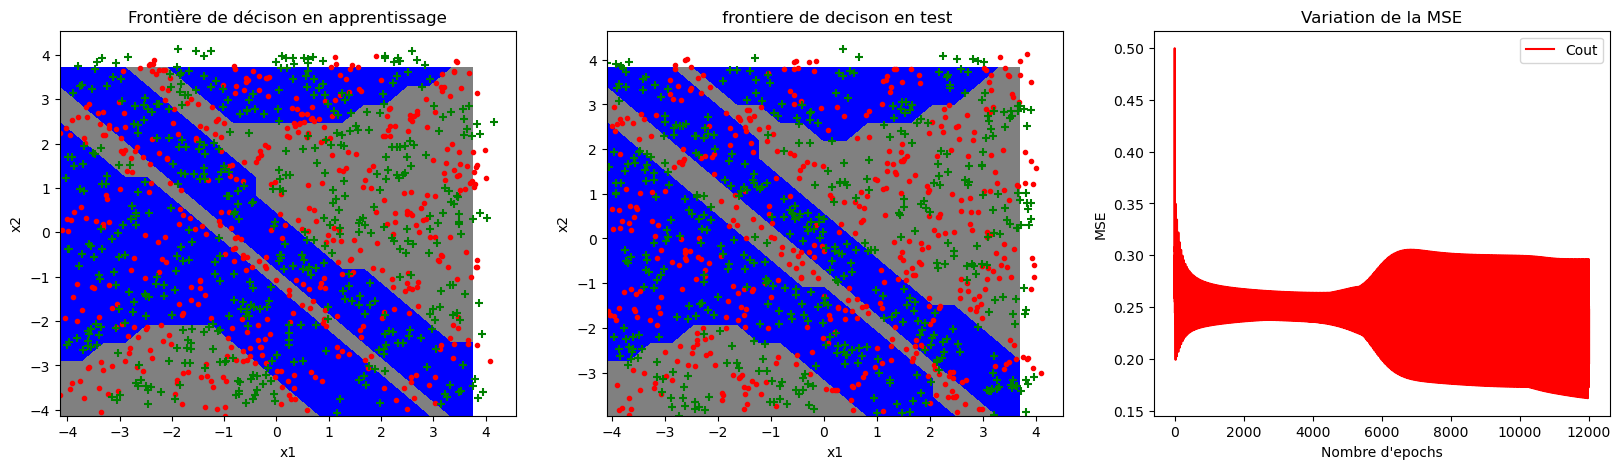

In [12]:
evaluate_encapsulation(opt, datax, datay, testx, testy) #iter == 300, nbbatch = 40

accuracy train:  0.525
accuracy test:  0.523


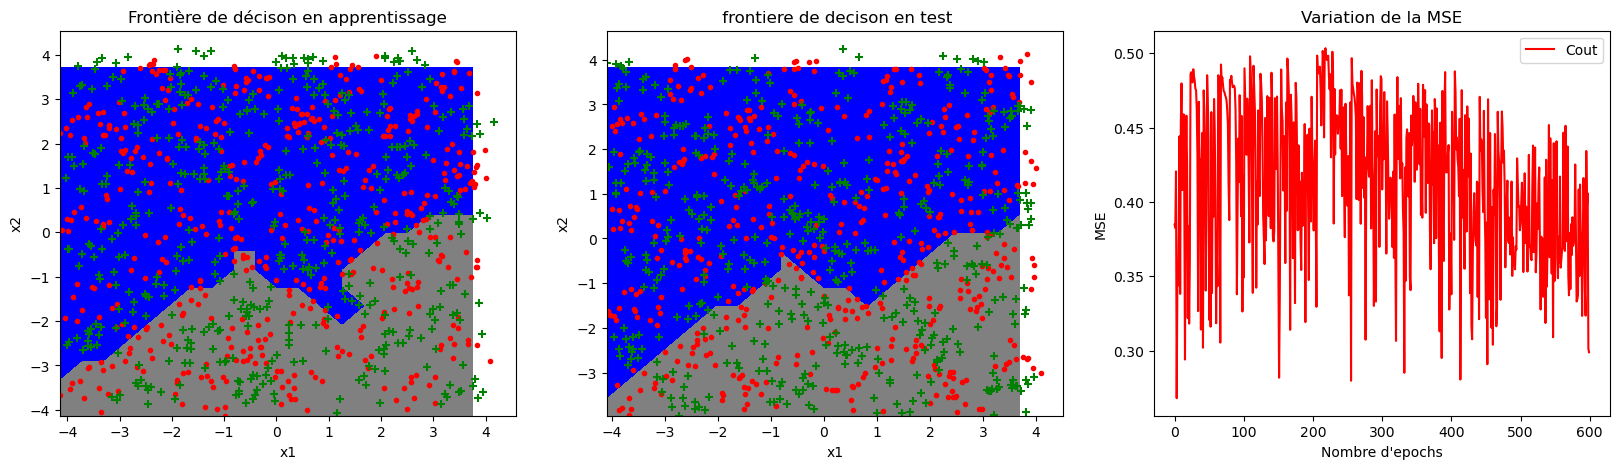

In [34]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # 600 et 1

accuracy train:  0.719
accuracy test:  0.694


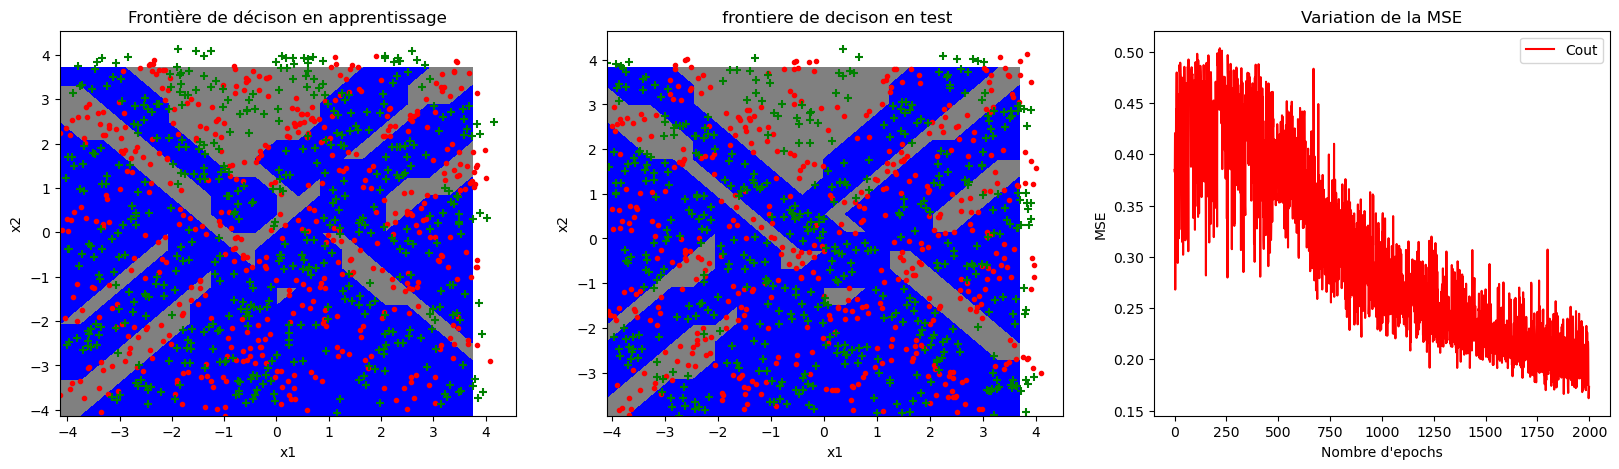

In [32]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # 2000 et 1

ic| X.shape: (1000, 2), Y.shape: (1000, 1)


accuracy train:  0.646
accuracy test:  0.633


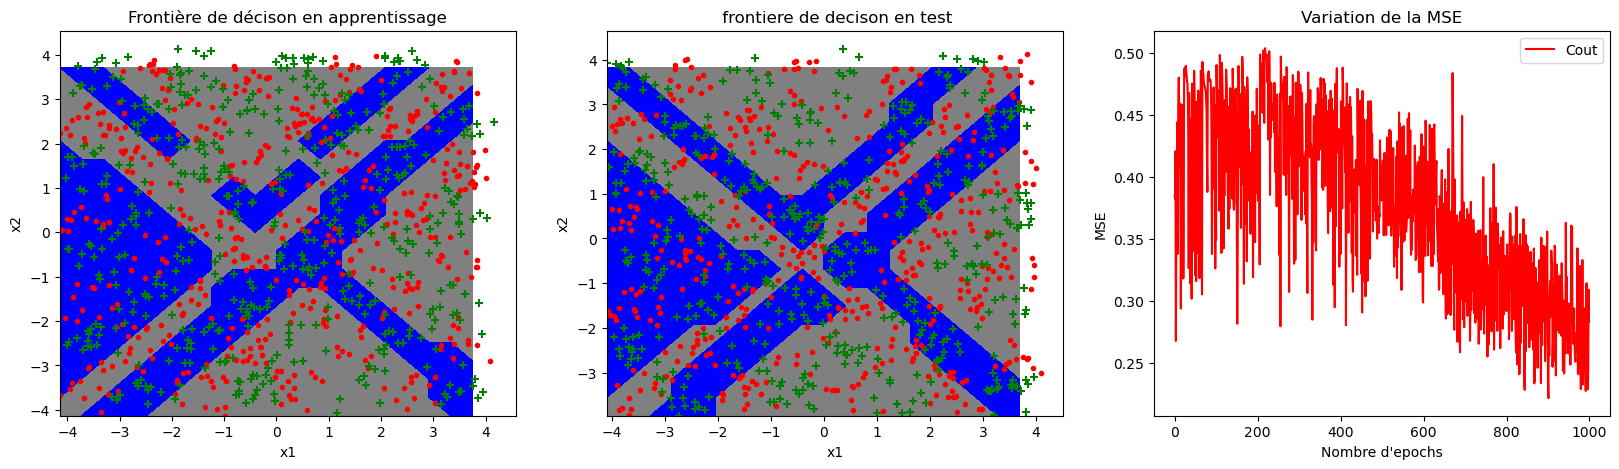

In [30]:
evaluate_encapsulation(opt, datax, datay, testx, testy) #1000 et 1

### Modifier eps

In [41]:
loss_mse = MSELoss()
lineaire1 = Linear(datax.shape[1], 32, init_type=1)
lineaire2 = Linear(32, 64, init_type=1)
lineaire3 = Linear(64, 32, init_type=1)
lineaire4 = Linear(32, 1, init_type=1)

sig = Sigmoide()
tan1 = Tanh()
tan2 = Tanh()
tan3 = Tanh()

iter = 1500

net = Sequentiel(lineaire1, tan2, lineaire2, tan2, lineaire3, tan3, lineaire4, sig)

net, couts, opt = SGD(net, datax, datay, nb_batch=10, loss=loss_mse, nb_epochs=iter, eps=1e-1, shuffle=False)

ic| X.shape: (1000, 2), Y.shape: (1000, 1)


accuracy train:  0.842
accuracy test:  0.753


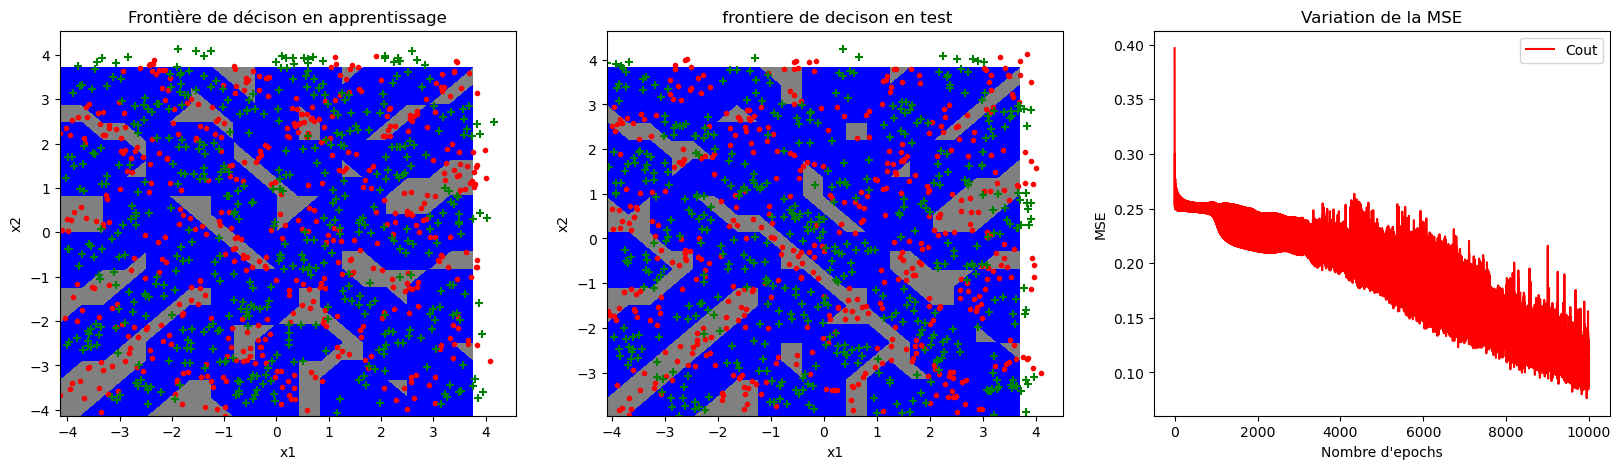

In [40]:
evaluate_encapsulation(opt, datax, datay, testx, testy) #  1000 iter batch 10 eps = 1e-2

accuracy train:  0.596
accuracy test:  0.586


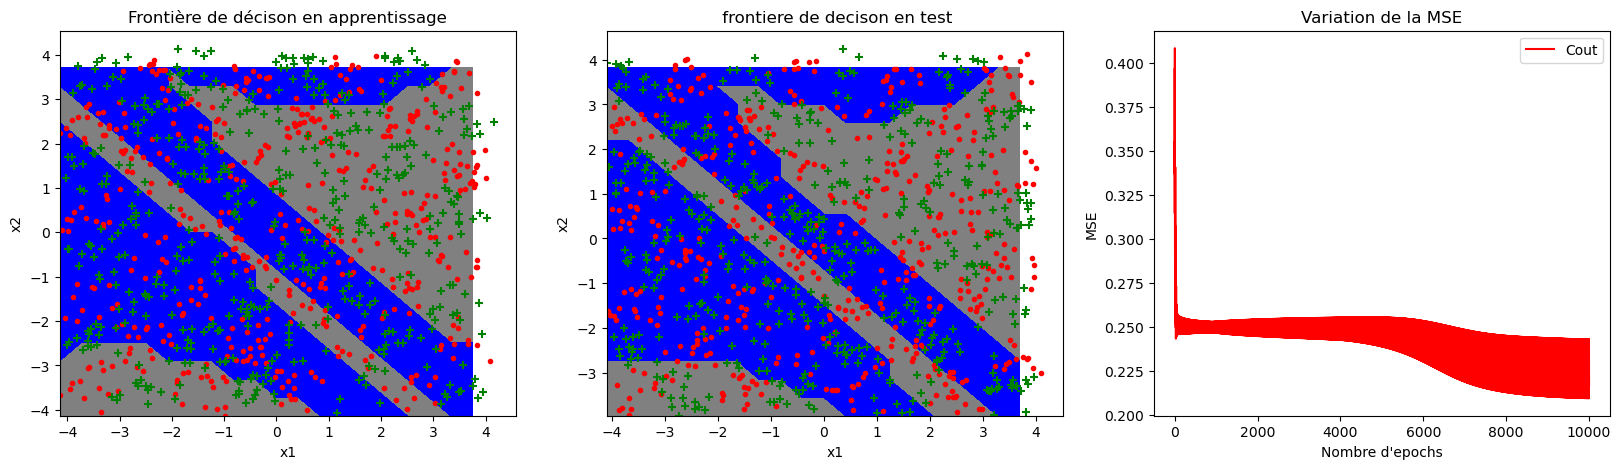

In [38]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # 1000 iter, 10 batchs et eps = 1e-3

accuracy train:  0.5
accuracy test:  0.485


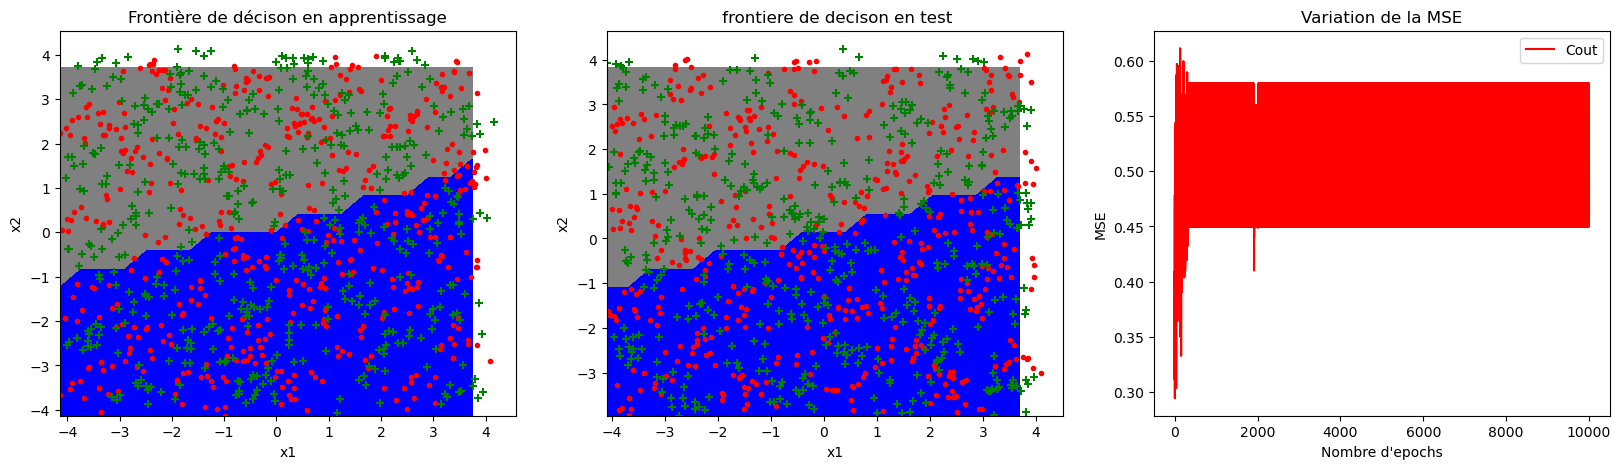

In [36]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # 1000 iter, 10 batchs et eps = 1e-1

## Modifier les dimensions des neurones

### 4 couches

In [15]:
loss_mse = MSELoss()
lineaire1 = Linear(datax.shape[1], 2, init_type=1)
lineaire2 = Linear(2, 2, init_type=1)
lineaire3 = Linear(2, 2, init_type=1)
lineaire4 = Linear(2, 1, init_type=1)

sig = Sigmoide()
tan1 = Tanh()
tan2 = Tanh()
tan3 = Tanh()

iter = 1000

net = Sequentiel(lineaire1, tan2, lineaire2, tan2, lineaire3, tan3, lineaire4, sig)

net, couts, opt = SGD(net, datax, datay, nb_batch=10, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=False)

ic| X.shape: (1000, 2), Y.shape: (1000, 1)


accuracy train:  0.509
accuracy test:  0.502


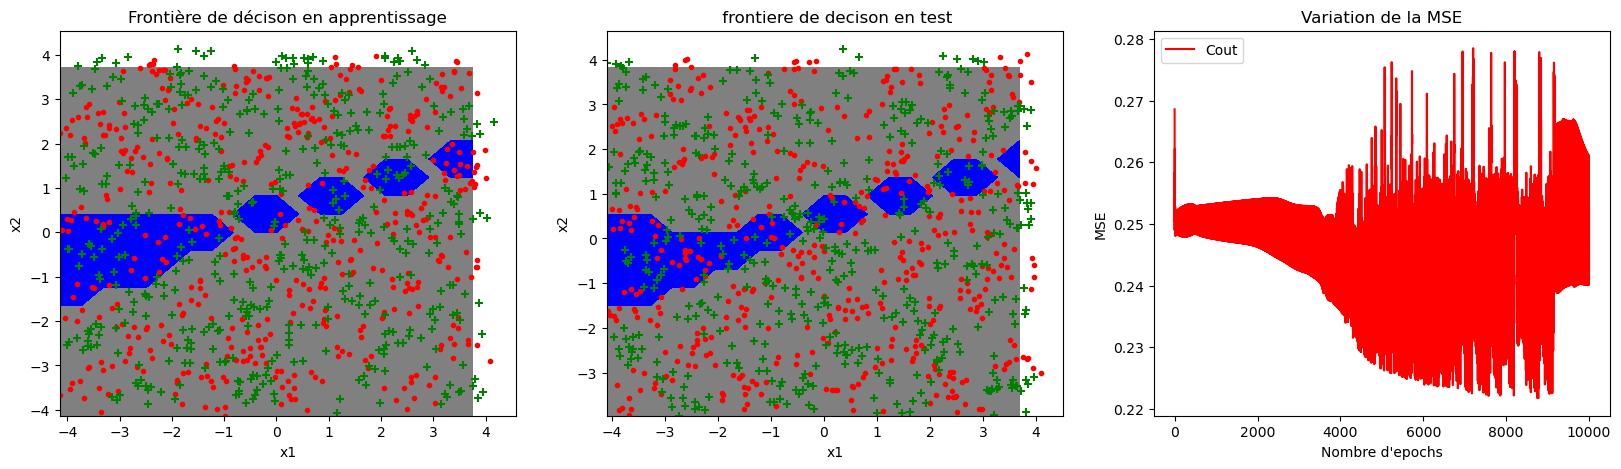

In [16]:
evaluate_encapsulation(opt, datax, datay, testx, testy) #2, 2, 2

accuracy train:  0.617
accuracy test:  0.588


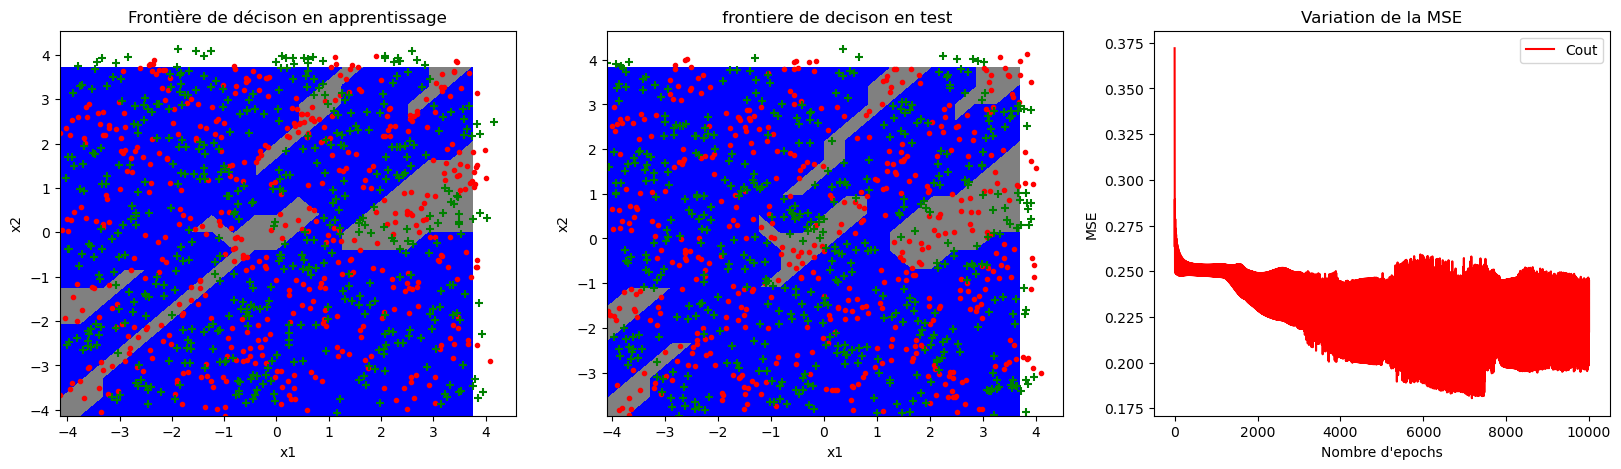

In [14]:
evaluate_encapsulation(opt, datax, datay, testx, testy) #4, 32, 4

accuracy train:  0.767
accuracy test:  0.695


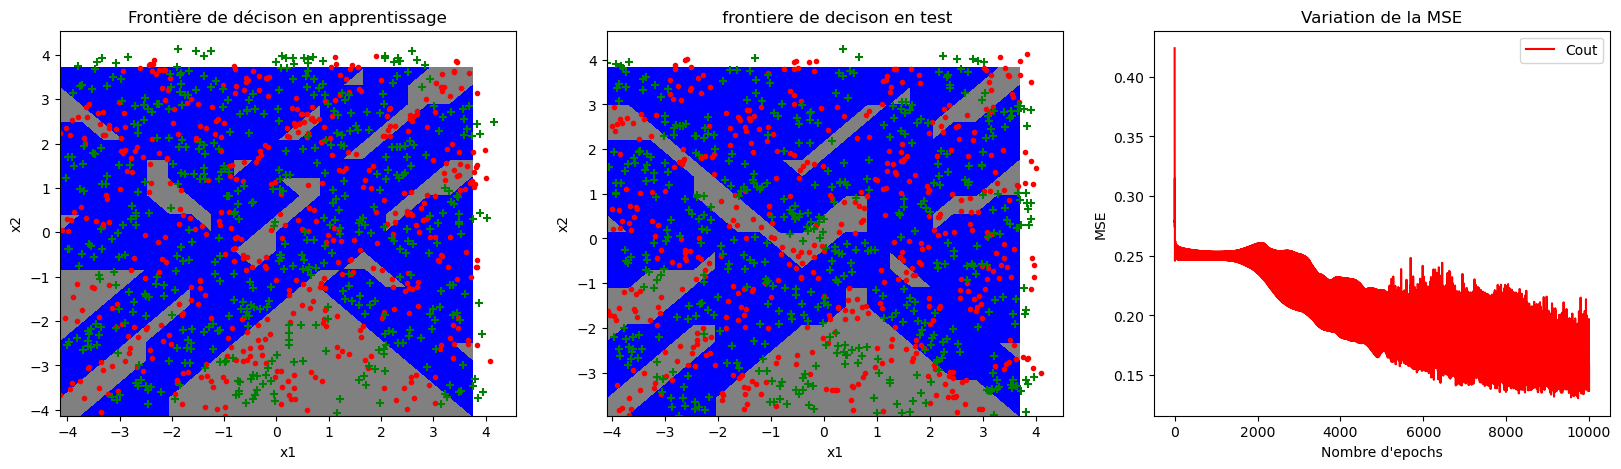

In [11]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # 10, 32, 10

In [ ]:
loss_mse = MSELoss()
lineaire1 = Linear(datax.shape[1], 128, init_type=1)
lineaire2 = Linear(128, 64, init_type=1)
lineaire3 = Linear(64, 32, init_type=1)
lineaire4 = Linear(32, 1, init_type=1)

sig = Sigmoide()
tan1 = ReLU()
tan2 = Tanh()
tan3 = Tanh()

iter = 1500

net = Sequentiel(lineaire1, tan1, lineaire2, tan2, lineaire3, tan3, lineaire4 sig)

net, couts, opt = SGD(net, datax, datay, nb_batch=10, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=False)

100%|██████████| 1500/1500 [00:58<00:00, 25.48it/s]


accuracy train:  0.906
accuracy test:  0.782


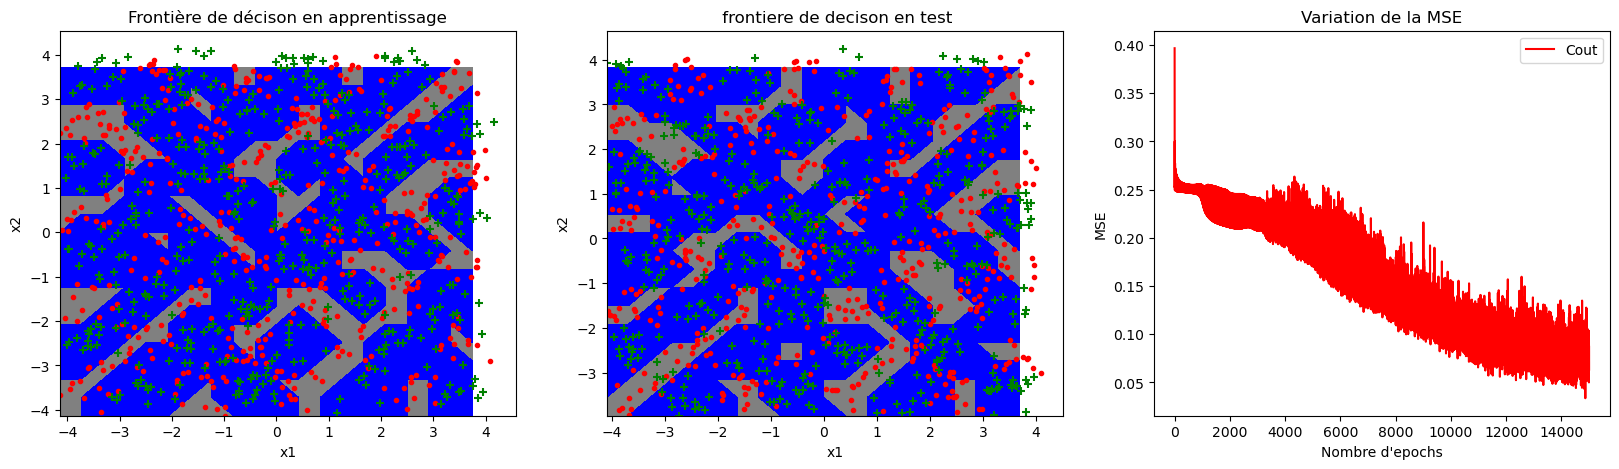

In [ ]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # 10 batchs, 1500 iter, 128-64-32, Relu, Relu, tanh, sig

### 2 Couches

In [26]:
loss_mse = MSELoss()
lineaire1 = Linear(datax.shape[1], 32, init_type=1)
lineaire2 = Linear(32, 1, init_type=1)
sig = Sigmoide()
tan = Tanh()

iter = 1000

net = Sequentiel(lineaire1, tan, lineaire2, sig)

net, couts, opt = SGD(net, datax,datay,nb_batch=20, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=False)

ic| X.shape: (1000, 2), Y.shape: (1000, 1)


accuracy train:  0.613
accuracy test:  0.606


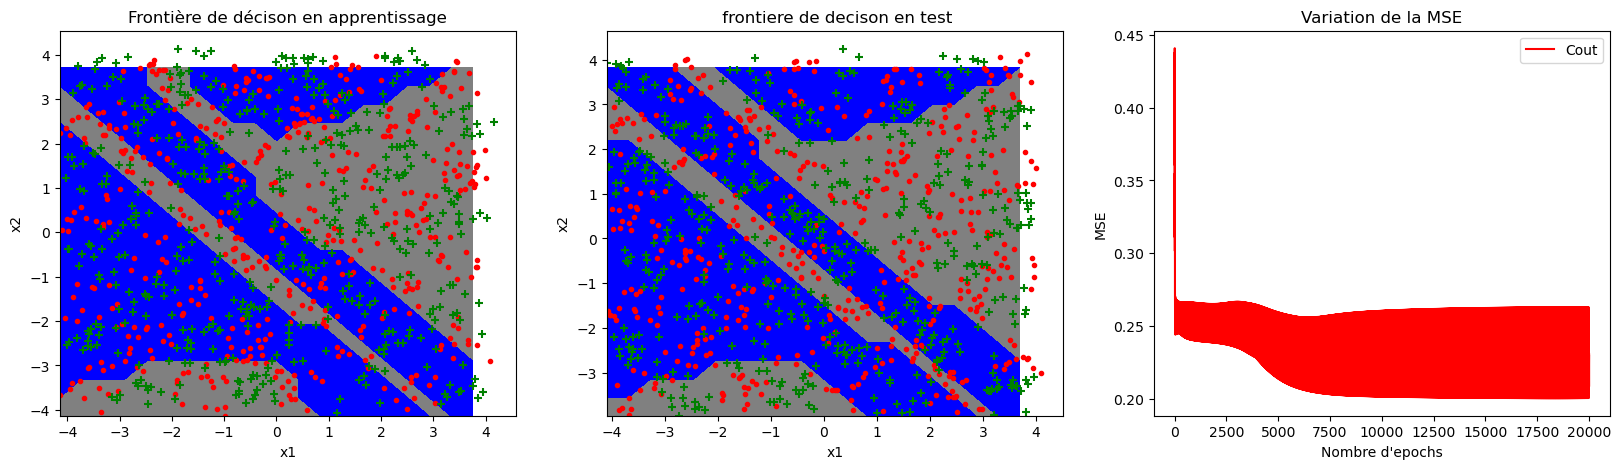

In [27]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # 32, 20 batchs

accuracy train:  0.611
accuracy test:  0.602


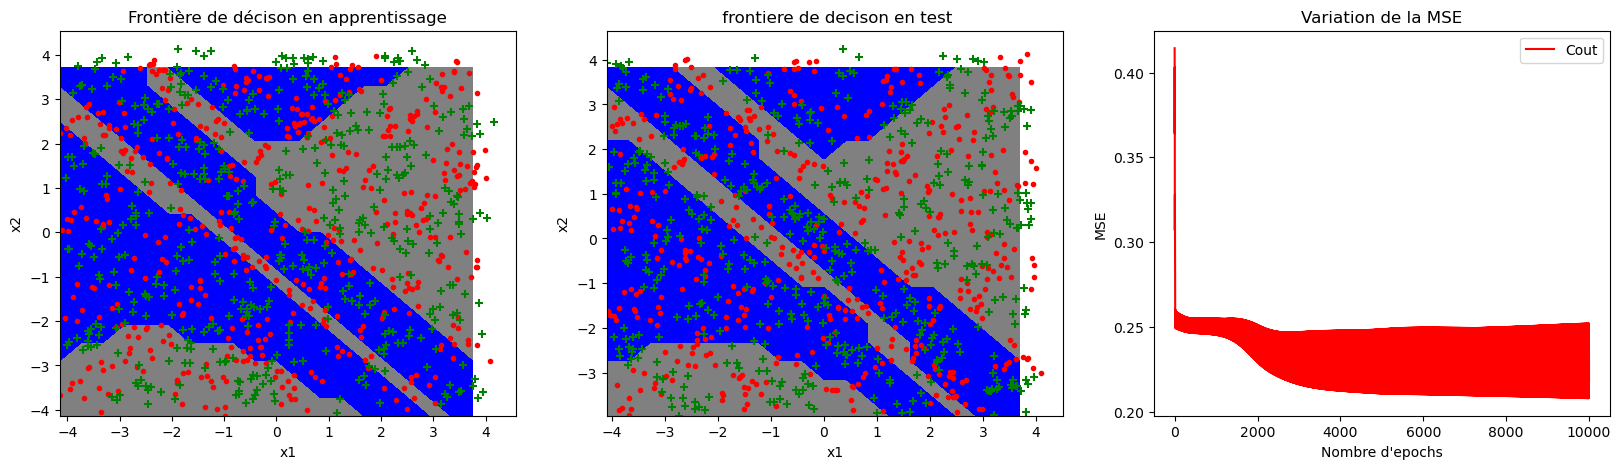

In [22]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # 32, 10 batchs

In [7]:
loss_mse = MSELoss()
lineaire1 = Linear(datax.shape[1], 64, init_type=1)
lineaire2 = Linear(64, 32, init_type=1)
lineaire3 = Linear(32, 1, init_type=1)

sig = Sigmoide()
tan1 = ReLU()
tan2 = Tanh()

iter = 1500

net = Sequentiel(lineaire1, tan1, lineaire2, tan2, lineaire3, sig)

net, couts, opt = SGD(net, datax, datay, nb_batch=10, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=False)

100%|██████████| 1500/1500 [00:55<00:00, 26.79it/s]


accuracy train:  0.849
accuracy test:  0.744


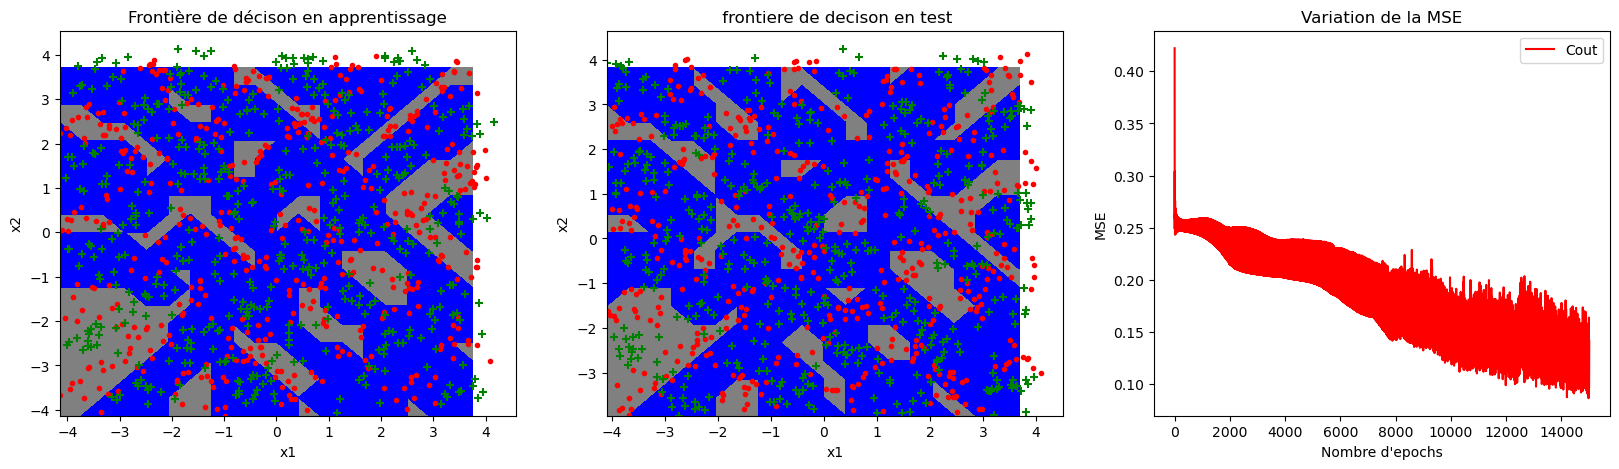

In [8]:
evaluate_encapsulation(opt, datax, datay, testx, testy) # Relu,tanh, sig, couche cachee = 64, 32, 1500 iter, 10 batchs